<a href="https://colab.research.google.com/github/stafars/sem-3_diart_mipt_hw/blob/main/HW1_Artyushchenko.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Источник (Файл ДЗ-1): https://colab.research.google.com/drive/1ERSjcwGIhwak_j0Z2VUfw23PC-UeEaiO

In [ ]:
!pip install marimo -qq
import marimo as mo

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.0/32.0 MB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.6/213.6 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.2/266.2 kB 19.9 MB/s eta 0:00:00


## Домашнее задание 1
### Цель задания

Сегодня ваша задача как гейм-аналитика — написать код,  чтобы найти наиболее прибыльные жанры игр и решить, какие 3 игры продаются лучше всех.

### Навыки

|Архитектура|Базы данных|Форматы данных|Инструменты|Коммуникации|ИИ     |
|-----------|-----------|--------------|-----------|------------|-------|
|Отсутствует|нет        |CSV/JSON      |Git        |нет         |ChatGPT|

### Условия

Можно пользоваться любыми языковыми моделями.

###  Формат сдачи и отправка задания

Итоговый блокнот нужно разместить на GitLab либо на GitHub («запушить» в любом формате .py или .ipynb)
и поделиться ссылкой на файл (убедившись в видимости репозитория).

###  Критерии оценивания

| Критерий | Вес | Описание |
|----------|-----|-----------|
| **Основная функциональность** | 2 | Все основные требования задания выполнены корректно (задания 2 и 4) |
| | 1 | Большая часть требований выполнена, но есть незначительные недочеты или пропуски |
|  | 0 | Основные требования не выполнены или выполнены некорректно|
| **Выбор алгоритма** | 1.5 | Выбранные подходы и алгоритмы (например, groupby().sum()) оптимальны и уместны для задачи |
|  | 0.5 | Подходы в целом верны, но могли бы быть более эффективными или уместными |
|  | 0 | Подходы не соответствуют задаче |
| **Точность реализации** | 1.5 | Код реализован корректно, без ошибок, расчеты точны, логика полностью соответствует задаче |
|  | 0.5 | Есть мелкие неточности или логические ошибки, не влияющие критически на результат |
|  | 0 | Содержит существенные ошибки, препятствующие получению верного результата|
| **Обработка краевых случаев** | 1 | Код устойчив к различным входным данным, учтены потенциальные краевые условия |
|  | 0 | Краевые случаи не учтены, возможны ошибки в специфических сценариях |
| **Документация к коду** | 1 | Код прокомментирован, комментарии ясны, помогают понять логику |
|  | 0 | Комментарии отсутствуют или бесполезны |
| **Объяснение результатов** | 1 | Выводы по результатам работы кода четкие, логичные и обоснованные данными |
|  | 0 | Выводы отсутствуют или не имеют отношения к данным |
| **Стиль кода** | 1 | Код читаем, соответствует стандартам PEP-8 |
|  | 0 | Код плохо читаем, стандарты стиля не соблюдены |
| **Анализ ошибок и отладка** | 1 | Способность выявить, понять и исправить ошибку (задание 5) показана полностью и эффективно |
|  | 0 | Ошибка не исправлена или понимание ее причин отсутствует |


**Максимальный балл за выполненную домашнюю работу: 10 баллов**

**Дополнительные условия оценки:**

Можно сдать работу через обычный Google Colab без начисления штрафных баллов и поделиться ссылкой на файл.

**Как будет проверяться:**

Работа будет проверяться преподавателем вручную в течение максимум одной недели.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
file_id = '1y1fqg7yWO6ifgnyJkuZ8IwmMqZjNCUq_'
url = f'https://drive.google.com/uc?export=download&id={file_id}'
videogames_dataset = pd.read_csv(url)
videogames_dataset.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


### **Задание 1**

Поработайте с кодом выше и скачайте датасет. Используя промпт ниже, скормите вашей LLM датасет и получите описание набора данных.
```
опишите набор данных на русском языке @videogames_dataset
```

#### Хорошая новость — вы моментально получите описание набора данных.

Данный набор данных содержит информацию о видеоиграх. Вот описание каждого столбца:

- `Name`: название видеоигры;
- `Platform`: платформа, для которой была выпущена игра (например, Wii, NES);
- `Year_of_Release`: год выпуска игры;
- `Genre`: жанр игры (например, спорт, гонки);
- `Publisher`: издатель игры;
- `NA_Sales`: продажи в Северной Америке (в миллионах единиц);
- `EU_Sales`: продажи в Европе (в миллионах единиц);
- `JP_Sales`: продажи в Японии (в миллионах единиц);
- `Other_Sales`: продажи в других регионах (в миллионах единиц);
- `Global_Sales`: глобальные продажи (в миллионах единиц);
- `Critic_Score`: оценка критиков (максимально 100);
- `Critic_Count`: количество оценок критиков;
- `User_Score`: оценка пользователей (обычно до 10);
- `User_Count`: количество оценок пользователей;
- `Developer`: разработчик игры;
- `Rating`: рейтинг ESRB (возрастная категория игры).

#### Плохая новость — за выполнение задания таким образом вы получите ноль баллов.

 Почему?

 Вы не писали код при выполнении этого задания.

 Мы здесь для того, чтобы научиться писать код при работе с данными.

# Скачивание

In [ ]:
# скачивание
import gdown
gdown.download(url)

Downloading...
From: https://drive.google.com/uc?export=download&id=1y1fqg7yWO6ifgnyJkuZ8IwmMqZjNCUq_
To: /content/Video_Games_Sales_as_at_22_Dec_2016.csv
100%|██████████| 1.61M/1.61M [00:00<00:00, 116MB/s]


'Video_Games_Sales_as_at_22_Dec_2016.csv'

In [ ]:
from google.colab import files
files.download('/content/Video_Games_Sales_as_at_22_Dec_2016.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Первичный анализ

In [2]:
# Делаем название датасета более унифицированным, чтобы при изменении имени датасета менять только одну строчку

df = videogames_dataset

# Вывод общей информации о структуре данных
df.info()
# Year_of_Release можно перевести в datetime формат

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


In [3]:
# Вывод основных метрик:
  # mean, std - среднее и стандартное отклонение
  # 25%, 50%, 75% - квартили (квантили, которые берут по четверти) 50% - он же медиана
  # если mean сильно отличается от квартиля 50% - может сигнализировать о выбросах

df.describe(include='all')

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
count,16717,16719,16450.000000,16717,16665,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000,7590.000000,10096,9950
unique,11562,31,NaN,12,582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1696,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ubisoft,E
freq,12,2161,NaN,3370,1356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204,3991
mean,NaN,NaN,2006.487356,NaN,NaN,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,7.125046,162.229908,NaN,NaN
std,NaN,NaN,5.878995,NaN,NaN,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,1.500006,561.282326,NaN,NaN
min,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,7.500000,24.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000,NaN,NaN


In [4]:
# Вывод пустых значений и дубликатов строк (разделение вывода пунктиром)

print(df.isnull().sum())
print('-----------------------')
print(df.duplicated().sum())

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64
-----------------------
0


<Axes: >

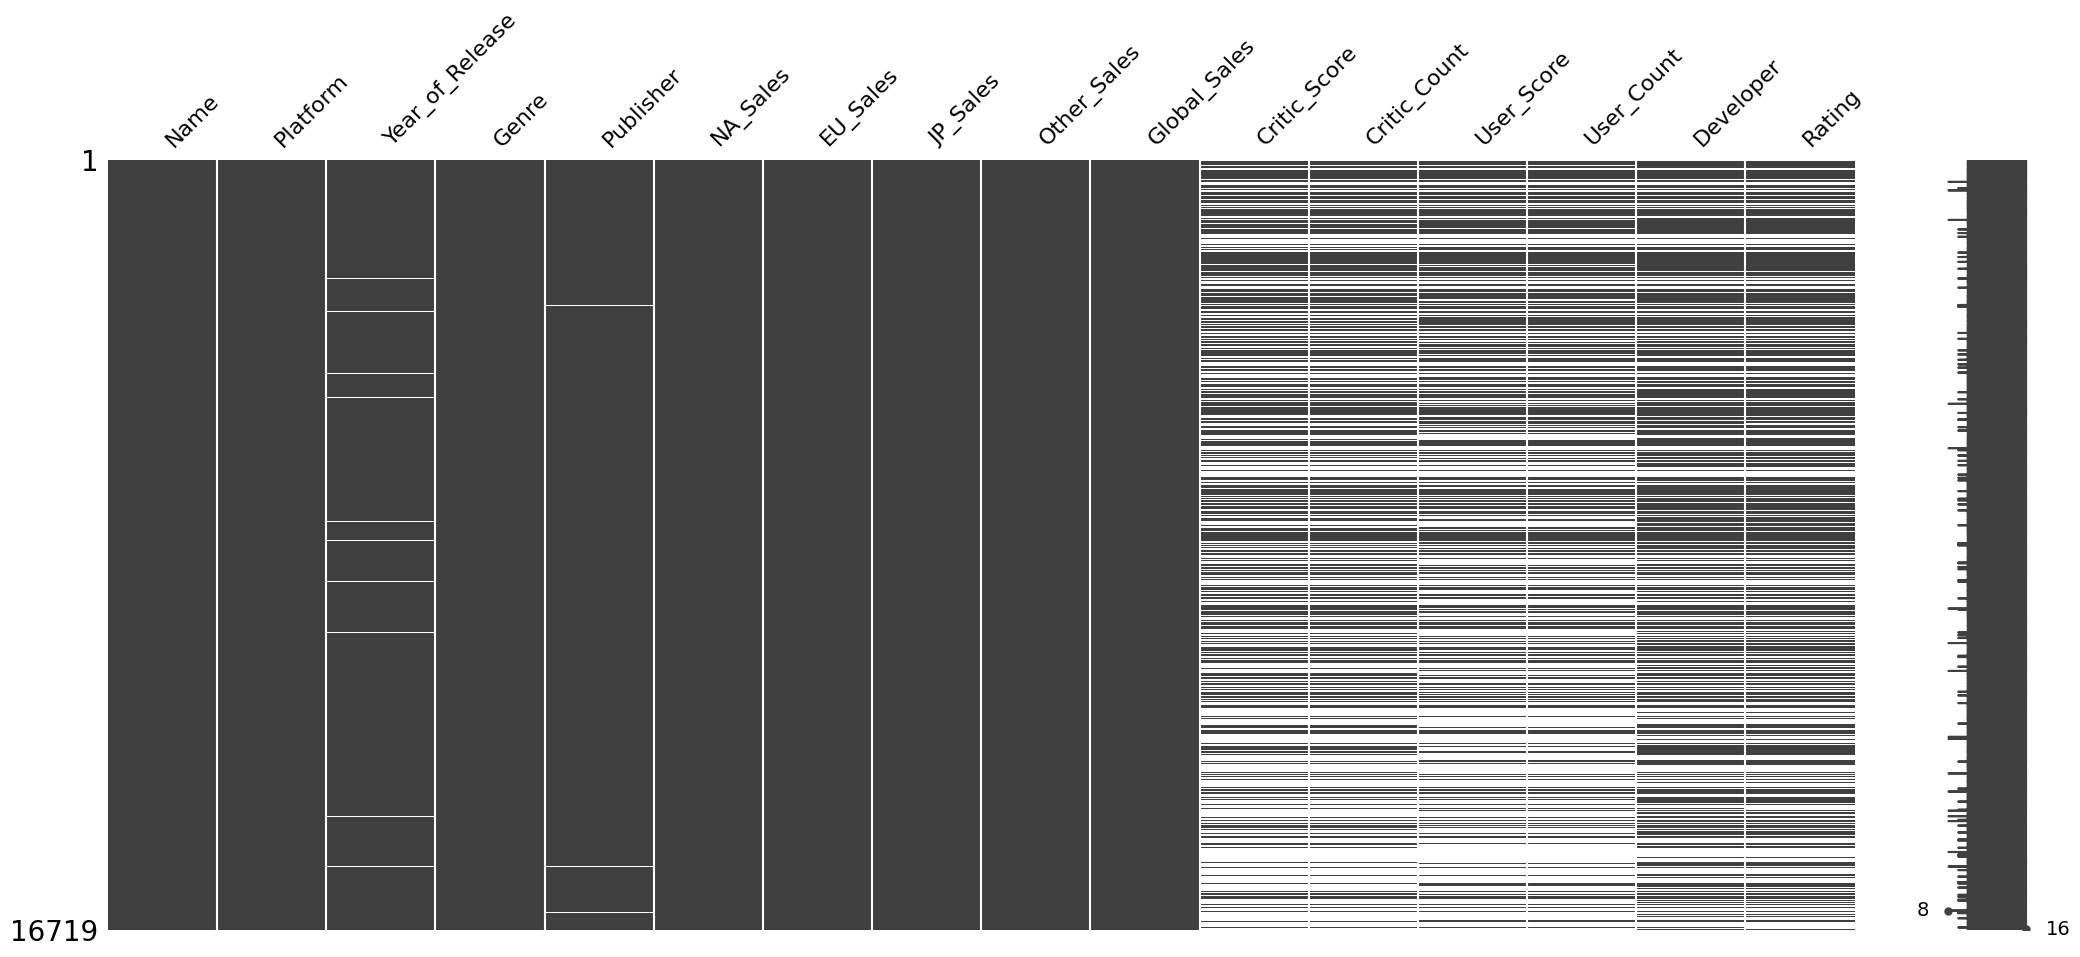

In [5]:
# Проверка на пропущенные значения с помощью библиотеки missingno для наглядности
import missingno
missingno.matrix(df)

In [ ]:
# В следующих полях слишком много пустых значений:
  # Critic_Score       8582
  # Critic_Count       8582
  # User_Score         9129
  # User_Count         9129
  # Developer          6623
  # Rating             6769

# Поля которые можно обработать:
  # Name                  2
  # Genre                 2
  # Year_of_Release     269
  # Publisher            54

In [6]:
# Делаем копию датасета, с которой будем работать по обработке данных
df_copy = df.copy()
df_llm = df.copy()

In [7]:
# Колонку Year_of_Release можно привести к datetime (год)
df_copy['Year_of_Release'] = pd.to_datetime(df_copy['Year_of_Release'], format='%Y', errors='coerce')
print(df_copy['Year_of_Release'].head())

0   2006-01-01
1   1985-01-01
2   2008-01-01
3   2009-01-01
4   1996-01-01
Name: Year_of_Release, dtype: datetime64[ns]


In [8]:
# Посмотрим что общего в колонках с пропусками Name
empty_name = df_copy[df_copy['Name'].isna()].reset_index(drop=True)
empty_name

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,NaN,GEN,1993-01-01,NaN,Acclaim Entertainment,1.78,0.53,0.00,0.08,2.39,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,GEN,1993-01-01,NaN,Acclaim Entertainment,0.00,0.00,0.03,0.00,0.03,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Посмотрим что общего в колонках с пропусками Year_of_Release
empty_year = df_copy[df_copy['Year_of_Release'].isna()].reset_index(drop=True)
empty_year

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Madden NFL 2004,PS2,NaT,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23,94.0,29.0,8.5,140.0,EA Tiburon,E
1,FIFA Soccer 2004,PS2,NaT,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49,84.0,20.0,6.4,76.0,EA Canada,E
2,LEGO Batman: The Videogame,Wii,NaT,Action,Warner Bros. Interactive Entertainment,1.80,0.97,0.00,0.29,3.06,74.0,17.0,7.9,22.0,Traveller's Tales,E10+
3,wwe Smackdown vs. Raw 2006,PS2,NaT,Fighting,NaN,1.57,1.02,0.00,0.41,3.00,NaN,NaN,NaN,NaN,NaN,NaN
4,Space Invaders,2600,NaT,Shooter,Atari,2.36,0.14,0.00,0.03,2.53,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,PDC World Championship Darts 2008,PSP,NaT,Sports,Oxygen Interactive,0.01,0.00,0.00,0.00,0.01,43.0,7.0,NaN,NaN,Oxygen Interactive,E10+
265,Freaky Flyers,GC,NaT,Racing,Unknown,0.01,0.00,0.00,0.00,0.01,69.0,14.0,6.5,6.0,Midway,T
266,Inversion,PC,NaT,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01,59.0,6.0,6.7,107.0,Saber Interactive,M
267,Hakuouki: Shinsengumi Kitan,PS3,NaT,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Вывести все строки с Acclaim Entertainment
acclaim_games = df[df['Publisher'] == 'Acclaim Entertainment']
acclaim_games

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
399,WWF War Zone,PS,1998.0,Fighting,Acclaim Entertainment,2.47,0.76,0.00,0.13,3.36,NaN,NaN,NaN,NaN,NaN,NaN
610,Crazy Taxi,PS2,2001.0,Racing,Acclaim Entertainment,1.13,1.12,0.06,0.22,2.52,80.0,15.0,7.9,46.0,Acclaim Studios Cheltenham,T
659,NaN,GEN,1993.0,NaN,Acclaim Entertainment,1.78,0.53,0.00,0.08,2.39,NaN,NaN,NaN,NaN,NaN,NaN
892,Mortal Kombat II,SNES,1993.0,Fighting,Acclaim Entertainment,1.48,0.39,0.00,0.06,1.93,NaN,NaN,NaN,NaN,NaN,NaN
933,Turok 2: Seeds of Evil,N64,1997.0,Platform,Acclaim Entertainment,1.37,0.41,0.04,0.04,1.86,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15357,XGRA: Extreme G Racing Association,GC,2003.0,Racing,Acclaim Entertainment,0.02,0.00,0.00,0.00,0.02,69.0,13.0,7.0,5.0,Acclaim Studios Cheltenham,T
15487,XGRA: Extreme G Racing Association,XB,2003.0,Racing,Acclaim Entertainment,0.02,0.00,0.00,0.00,0.02,66.0,15.0,6.8,5.0,Acclaim Studios Cheltenham,T
15553,Mortal Kombat,PC,1994.0,Fighting,Acclaim Entertainment,0.02,0.00,0.00,0.00,0.02,NaN,NaN,NaN,NaN,NaN,NaN
15581,Speed Kings,GC,2003.0,Racing,Acclaim Entertainment,0.01,0.00,0.00,0.00,0.02,59.0,9.0,NaN,NaN,Climax Group,E


# Выводы
1.   Есть пропуски в данных, с незначительными можно работать
2.   Наиболее оптимальным вариантом восстановить пропуски выглядит использование LLM, т.к. отсутствующие данные можно найти скомбинировав другие, напр.:
*   По Name: найти Year_of_Release и Publisher;
*   По Platform, Publisher и Year_of_Release определить Name и Genre







In [12]:
# Столбцы с пропусками, которые хотим обработать
cols_with_missing = ['Name', 'Genre', 'Year_of_Release', 'Publisher']

# Фильтруем строки, где есть пропуски в этих столбцах
df_missing = df_copy[df_copy[cols_with_missing].isnull().any(axis=1)]

df_missing = df_missing.reset_index()
df_missing
# Сохраняем только эти строки в отдельный CSV для LLM
#df_missing.to_csv('vgsales_missing.csv', index=False)

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,183,Madden NFL 2004,PS2,NaT,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23,94.0,29.0,8.5,140.0,EA Tiburon,E
1,377,FIFA Soccer 2004,PS2,NaT,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49,84.0,20.0,6.4,76.0,EA Canada,E
2,456,LEGO Batman: The Videogame,Wii,NaT,Action,Warner Bros. Interactive Entertainment,1.80,0.97,0.00,0.29,3.06,74.0,17.0,7.9,22.0,Traveller's Tales,E10+
3,475,wwe Smackdown vs. Raw 2006,PS2,NaT,Fighting,NaN,1.57,1.02,0.00,0.41,3.00,NaN,NaN,NaN,NaN,NaN,NaN
4,609,Space Invaders,2600,NaT,Shooter,Atari,2.36,0.14,0.00,0.03,2.53,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,16409,Freaky Flyers,GC,NaT,Racing,Unknown,0.01,0.00,0.00,0.00,0.01,69.0,14.0,6.5,6.0,Midway,T
299,16452,Inversion,PC,NaT,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01,59.0,6.0,6.7,107.0,Saber Interactive,M
300,16462,Hakuouki: Shinsengumi Kitan,PS3,NaT,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
301,16526,Virtua Quest,GC,NaT,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01,55.0,19.0,5.5,12.0,Artificial Mind and Movement,T


# Заполнение пропусков при помощи LLM

# Вариант с OpenAI

In [ ]:
# Пример возможной обработки пропусков на открытых данных с помощью LLM

import openai
import pandas as pd
import json
from openai import OpenAI
import numpy as np

from google.colab import userdata
api_key = userdata.get('GPT-API')

# Настройка клиента (для openai>=1.0.0)
client = openai.OpenAI(api_key=api_key)

def fill_with_openai(df_missing):
    """
    Заполняет пропуски через OpenAI GPT-4o-mini
    """
    # Преобразуем данные в JSON для промпта
    data_json = df_missing.to_json(orient='records', indent=2)

    # Создаем промпт
    prompt = f"""
Ты эксперт по видеоиграм. Заполни пропущенные значения (null) в данном наборе данных.

ИСХОДНЫЕ ДАННЫЕ в JSON формате:
{data_json}

ИНСТРУКЦИИ:
1. Заполни ВСЕ null значения в столбцах: Name, Genre, Year_of_Release, Publisher
2. Используй только реальные, достоверные данные о видеоиграх
3. Для Year_of_Release используй только годы между 1970-2024
4. Для Genre используй стандартные жанры: Action, Adventure, RPG, Shooter, Sports, Platform, Strategy, Puzzle, Racing
5. Сохрани все оригинальные значения, которые уже заполнены
6. Верни ОДИН JSON массив с теми же объектами, но с заполненными пропусками

ВЕРНИ ТОЛЬКО JSON БЕЗ КАКИХ-ЛИБО ПОЯСНЕНИЙ ИЛИ ОБЕРТОК!
"""

    try:
        # Отправляем запрос к OpenAI
        response = client.chat.completions.create(
            model="gpt-4o-mini",
            messages=[
                {"role": "system", "content": "Ты помощник для заполнения пропусков в данных о видеоиграх. Отвечай только JSON."},
                {"role": "user", "content": prompt}
            ],
            temperature=0.1,
            max_tokens=4000
        )

        # Извлекаем ответ
        result_text = response.choices[0].message.content.strip()

        # Парсим JSON
        filled_data = json.loads(result_text)

        # Конвертируем обратно в DataFrame
        return pd.DataFrame(filled_data)

    except Exception as e:
        print(f"Ошибка: {e}")
        return df_missing


# вариант с Deepseek
требуется подписка

In [ ]:
# deepseek требует платной подписки
'''
import requests
import json

def fill_with_deepseek(df_missing):
    """Альтернатива с DeepSeek"""


    prompt = f"""
Заполни все пропуски в датасете видеоигр. Верни только JSON.

Данные: {df_missing.to_json(orient='records')}

Заполни null значения в: Name, Genre, Year_of_Release, Publisher.
Используй реальные данные об играх.
"""

    response = requests.post(
        "https://api.deepseek.com/v1/chat/completions",
        headers={"Authorization": f"Bearer {api_key}"},
        json={
            "model": "deepseek-chat",
            "messages": [{"role": "user", "content": prompt}],
            "temperature": 0.1
        }
    )

    result = response.json()
    content = result['choices'][0]['message']['content']
    filled_data = json.loads(content)
    return pd.DataFrame(filled_data)
'''

'''
  Статус ответа: 402
  Ошибка API! Статус: 402
  Текст ответа: {"error":{"message":"Insufficient Balance","type":"unknown_error","param":null,"code":"invalid_request_error"}}
'''

### **Задание 2**



Сделайте вывод: какие три жанра игр приносят наибольшую выручку?

# Работа с переменными

# Числовые

In [ ]:
# Выделяем числовые переменные
numeric_vars = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

df_copy[numeric_vars].head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,41.36,28.96,3.77,8.45,82.53
1,29.08,3.58,6.81,0.77,40.24
2,15.68,12.76,3.79,3.29,35.52
3,15.61,10.93,3.28,2.95,32.77
4,11.27,8.89,10.22,1.00,31.37


In [ ]:
# Считаем основные метрики
df_copy[numeric_vars].describe().round(2)

# mean, std - среднее и стандартное отклонение
# 25%, 50%, 75% - квартили (квантили, которые берут по четверти) 50% - он же медиана
# если mean сильно отличается от 50% (медианы) - может сигнализировать о выбросах

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16719.00,16719.00,16719.00,16719.00,16719.00
mean,0.26,0.15,0.08,0.05,0.53
std,0.81,0.50,0.31,0.19,1.55
min,0.00,0.00,0.00,0.00,0.01
25%,0.00,0.00,0.00,0.00,0.06
50%,0.08,0.02,0.00,0.01,0.17
75%,0.24,0.11,0.04,0.03,0.47
max,41.36,28.96,10.22,10.57,82.53


In [ ]:
# Здесь наблюдается разница в 2+ раза между mean и 50% по всем колонкам, что может сигнализировать о выбросах

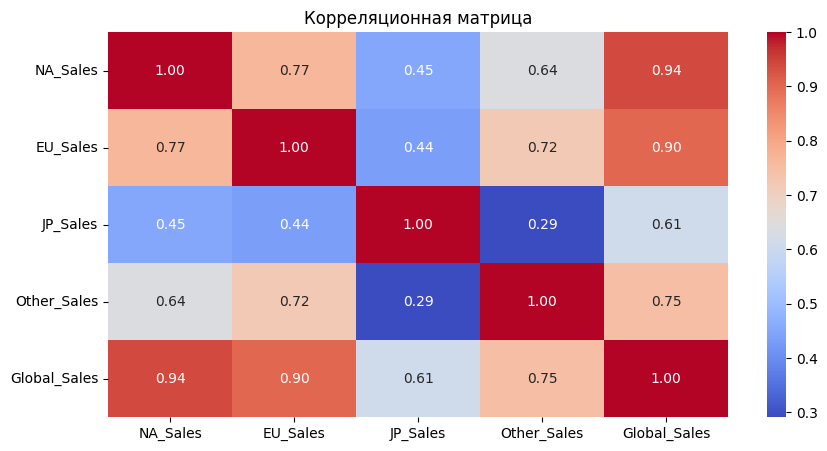

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
NA_Sales,1.00,0.77,0.45,0.64,0.94
EU_Sales,0.77,1.00,0.44,0.72,0.90
JP_Sales,0.45,0.44,1.00,0.29,0.61
Other_Sales,0.64,0.72,0.29,1.00,0.75
Global_Sales,0.94,0.90,0.61,0.75,1.00


In [ ]:
# Корреляционная тепловая матрица для числовых переменных
correlation_matrix = df_copy[numeric_vars].corr()
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная матрица')
plt.show()

# Стандартное представление
df_copy[numeric_vars].corr().round(2)

In [ ]:
# Заметна сильная корреляция между мировыми продажами и американскими, европейскими
# Можно сделать вывод, что основная доля продаж приходится на Америку и Европу

# Категориальные переменные

In [ ]:
# Выделяем категориальные переменные
cat_vars = ['Genre', 'Platform','Publisher']

,Global_Sales
Genre,
Action,1745.27
Sports,1332.00
Shooter,1052.94


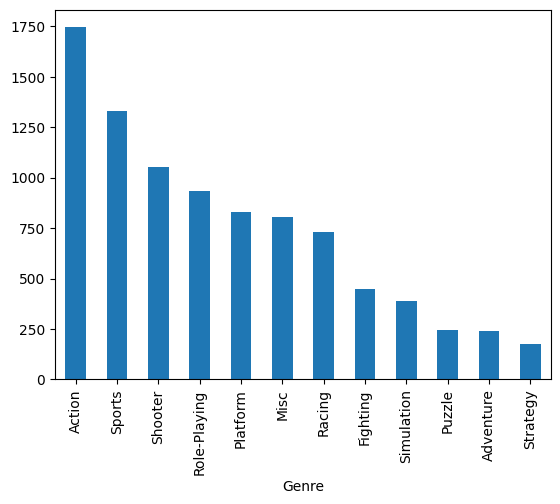

In [ ]:
# Считаем как разделяются игры по жанру
genre_table = df_copy.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

genre_table.plot.bar() # Применяем стандартный barplot

genre_table.head(3) # Выводим количественно топ-3

In [ ]:
# Видно, что больше всего прибыль приносят игры в жанре Action, Sports, Shooter

        напишите свой ответ здесь → `Action, Sports, Shooter`

### **Задание 3**

Вы сохраняли результат своей работы локально. Насколько это удобно с точки зрения работы в компании, где в работу вовлечены коллегами?

          напишите свой ответ здесь → `локально неудобно, но облачная работа с файлом или кодом (+ версионированием как в git) - решает проблему`

### **Задание 4**

Подтвердите или опровергните вывод о том, что первые три строчки в глобальных продажах Nintendo занимают игры:

- Wii Sports;
- Super Mario Bros;
- Mario Kart Wii.

In [ ]:
# Проверяем на наличие дубликатов по Name, т.к. одна и та же игра могла перевыпускаться

# Фильтруем по Nintendo
nintendo_df = df_copy[df_copy['Publisher'] == 'Nintendo']

# Посчитаем количество появлений каждого Name
name_counts = nintendo_df['Name'].value_counts()

# Выведем только те имена, которые встречаются более одного раза (дубликаты)
duplicates = name_counts[name_counts > 1]

duplicates.head(3)

,count
Name,
Monster Hunter Tri,3
Mario Tennis,3
Donkey Kong Country,3


In [ ]:
# Т.к. дубликаты есть, требуется группировка по Name

In [ ]:
# Фильтрация по издателю Nintendo

nintendo_sales = df_copy[df_copy['Publisher'] == 'Nintendo'].groupby('Name')['Global_Sales'].sum()

nintendo_sales.sort_values(ascending=False).head(3)


,Global_Sales
Name,
Wii Sports,82.53
Super Mario Bros.,45.31
Tetris,35.84


        напишите свой ответ здесь → `Вывод опровергается, топ-3 строчек занимают игры: Wii Sports, Super Mario Bros., Tetris`

### **Задание 5**

При написании кода разработчики и дата-сайентисты допускают ошибки. Это нормально — ошибки неизбежно возникают при создании программного обеспечения. По разным данным, на устранение багов тратится до 25% времени. Допустим, что при выполнении задания №4 вы допустили досадную оплошность и при создании датафрейма указали несуществующий метод **from_dictionary** вместо правильного метода **from_dict**.

1. Скопируйте код ниже.

2. Создайте ячейку с кодом (нажав на кнопку Python внизу).

3. Если вы работаете через marimo notebook, то вставьте код в созданную ячейку и получите ошибку *AttributeError: type object 'DataFrame' has no attribute 'from_dictionary'*
Если вы используете другую среду, обратитесь к LLM напрямую.

4. Если вы работаете через marimo notebook, то исправьте ошибку, нажав на кнопку Fix with AI и затем нажмите Enter в открывшейся ячейке. После завершения генерации нажми Accept справа, чтобы вставить исправленный результат в блокнот.
Если вы используете другую среду, обратитесь к LLM напрямую.


```python
df = pd.DataFrame.from_dictionary([  {"Name":"Wii Sports","Global_Sales":82.53},
                                     {"Name":"Super Mario Bros.","Global_Sales":40.24},
                                     {"Name":"Mario Kart Wii","Global_Sales":35.52}],
                                     orient='columns')
df
```

In [ ]:
df = pd.DataFrame.from_dictionary([  {"Name":"Wii Sports","Global_Sales":82.53},
                                     {"Name":"Super Mario Bros.","Global_Sales":40.24},
                                     {"Name":"Mario Kart Wii","Global_Sales":35.52}],
                                     orient='columns')

AttributeError: type object 'DataFrame' has no attribute 'from_dictionary'

In [ ]:
# При использовании встроенного решения gemini, также работает исправление кода, ответ от gemini:
  # It seems like there's a small typo in the code. The method to create a DataFrame from a dictionary is from_dict, not from_dictionary. I'll fix that for you.
  # Great! You've successfully fixed the error and created the DataFrame. Is there anything else you'd like to do with this dataset, like performing more analysis or visualizations based on the tasks outlined in the notebook?

In [ ]:
df = pd.DataFrame.from_dict([  {"Name":"Wii Sports","Global_Sales":82.53},
                                     {"Name":"Super Mario Bros.","Global_Sales":40.24},
                                     {"Name":"Mario Kart Wii","Global_Sales":35.52}],
                                     orient='columns')
df

,Name,Global_Sales
0,Wii Sports,82.53
1,Super Mario Bros.,40.24
2,Mario Kart Wii,35.52


### **Задание на дополнительный балл**

Скопируйте код ниже, создайте ячейку с кодом (нажав на кнопку Python внизу) и вставьте код в созданную ячейку.

Постройте график зависимости потребности в труде L (по оси Y) от доли задач, подлежащих полной автоматизации $Φ(i)$ (по оси Х) ,
используя формулу $Φ = K/L   / (1 + K/L)$, где L — количество единиц рабочей силы, $K$ — количество единиц капитала, $Φ(i)$ — функция распределения.

```python
df = pd.DataFrame.from_dictionary([ {"K":[0.00,0.25,0.50,0.75,1.00]},
                                    {"L":[1.00,0.75,0.50,0.25,0.00]},
                                    {"phi":[0.00,0.25,0.50,0.75,"∞" ]}],
                                     orient='columns')
df
```

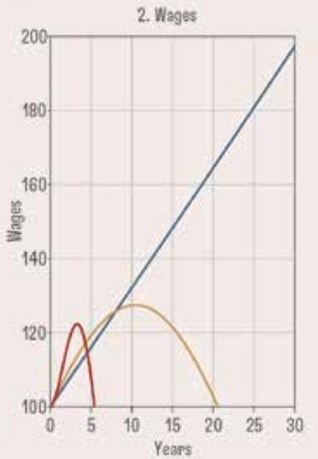

Проведите сравнение заработных плат при разных сценариях полной автоматизации. Для выполнения задания изучите источник: https://www.nber.org/system/files/working_papers/w32255/w32255.pdf

In [19]:
# Исходный df
df = pd.DataFrame.from_dict({
    "K": [0.00,0.25,0.50,0.75,1.00],
    "L": [1.00,0.75,0.50,0.25,0.00],
    "phi": [0.00,0.25,0.50,0.75,np.inf]  # Замена "∞" на np.inf
}, orient='columns')

# Функция для расчета phi по формуле
def calculate_phi_formula(K, L):
    """Вычисляет Φ = K/L / (1 + K/L)"""
    if L == 0:
        return np.inf  # Бесконечность при нулевом труде
    return (K / L) / (1 + K / L)

# Столбец с расчетными значениями
df['phi_calculated'] = df.apply(lambda row: calculate_phi_formula(row['K'], row['L']), axis=1)


print(df)

      K     L   phi  phi_calculated
0  0.00  1.00  0.00            0.00
1  0.25  0.75  0.25            0.25
2  0.50  0.50  0.50            0.50
3  0.75  0.25  0.75            0.75
4  1.00  0.00   inf             inf


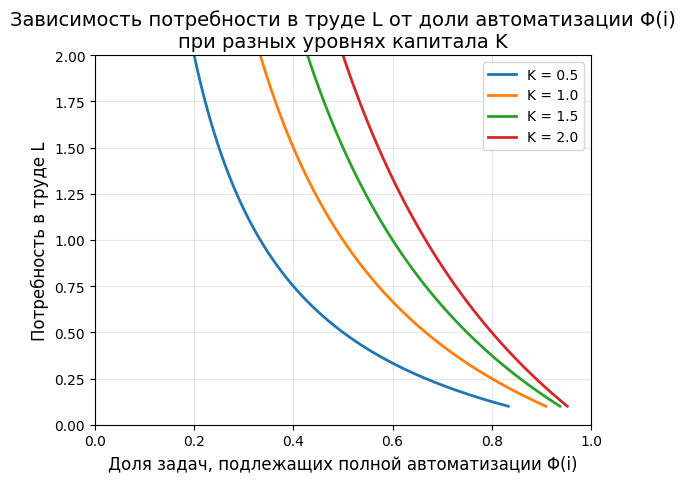

In [21]:
# Визуализация

import matplotlib.pyplot as plt

for K in K_values:
    phi_values = [calculate_phi_formula(K, L) for L in L_values]
    plt.plot(phi_values, L_values, label=f'K = {K}', linewidth=2)

plt.xlabel('Доля задач, подлежащих полной автоматизации Φ(i)', fontsize=12)
plt.ylabel('Потребность в труде L', fontsize=12)
plt.title('Зависимость потребности в труде L от доли автоматизации Φ(i)\nпри разных уровнях капитала K', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim(0, 1)
plt.ylim(0, 2)
plt.show()

          напишите свой вывод
          
          1. При росте автоматизации (Φ) потребность в труде (L) снижается
          2. При увеличении капитала можно достичь бОльшей автоматизации
          3. Оптимально - сохранять баланс между автоматизацией и сохранением труда, т.к. полная автоматизация можем привести к безработице и социальным конфликтам